# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting of the Data
#### 3. Line Chart of the Data
#### 4. Time series analysis: Decomposition
#### 5. Testing for stationarity ( Dicky-Fuller Test / Autocorelation Test )
#### 6. Stationarizing the Data

## 01. Importing Libraries and Data 

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'zzzmkL6ZoKjhhdciyKyN'

In [3]:
# Defing the path
path = r'/Users/Ayaz/Desktop/Boat Sales Analysis'

In [4]:
# Importing Dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_boats.csv'), index_col = False)

In [5]:
# Display all rows without scrolling.
pd.set_option('display.max_rows', None)

In [6]:
df.head()

,Unnamed: 0,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,currency,value,value_in_eur,country
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,CHF,3337,3337.0,Switzerland
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490.0,Germany
2,2,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,DKK,25900,3367.0,Denmark
3,3,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399.0,Germany
4,4,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,CHF,3600,3600.0,Switzerland


In [7]:
df.shape

(9192, 13)

## 02. Subset of the Data set if necessary.

Subsetting dataframe is not neceesary for performing a time series analysis on the 'year_built' column. We are only intersted in the relationship between 'year_built' and 'value_in_eur' therefore subsetting not required. 

## 03. Line Chart of the Data.

The 'year_built' column represent the year in which the boat was built and the 'value_in_eur' represent the price of the boat, then we will use the meadian or mean of the 'value_in_eur' column for each year to observe the linear trend over the time.
 Here I am using the median value of price for each year.

Text(0, 0.5, 'Median Value in EURO')

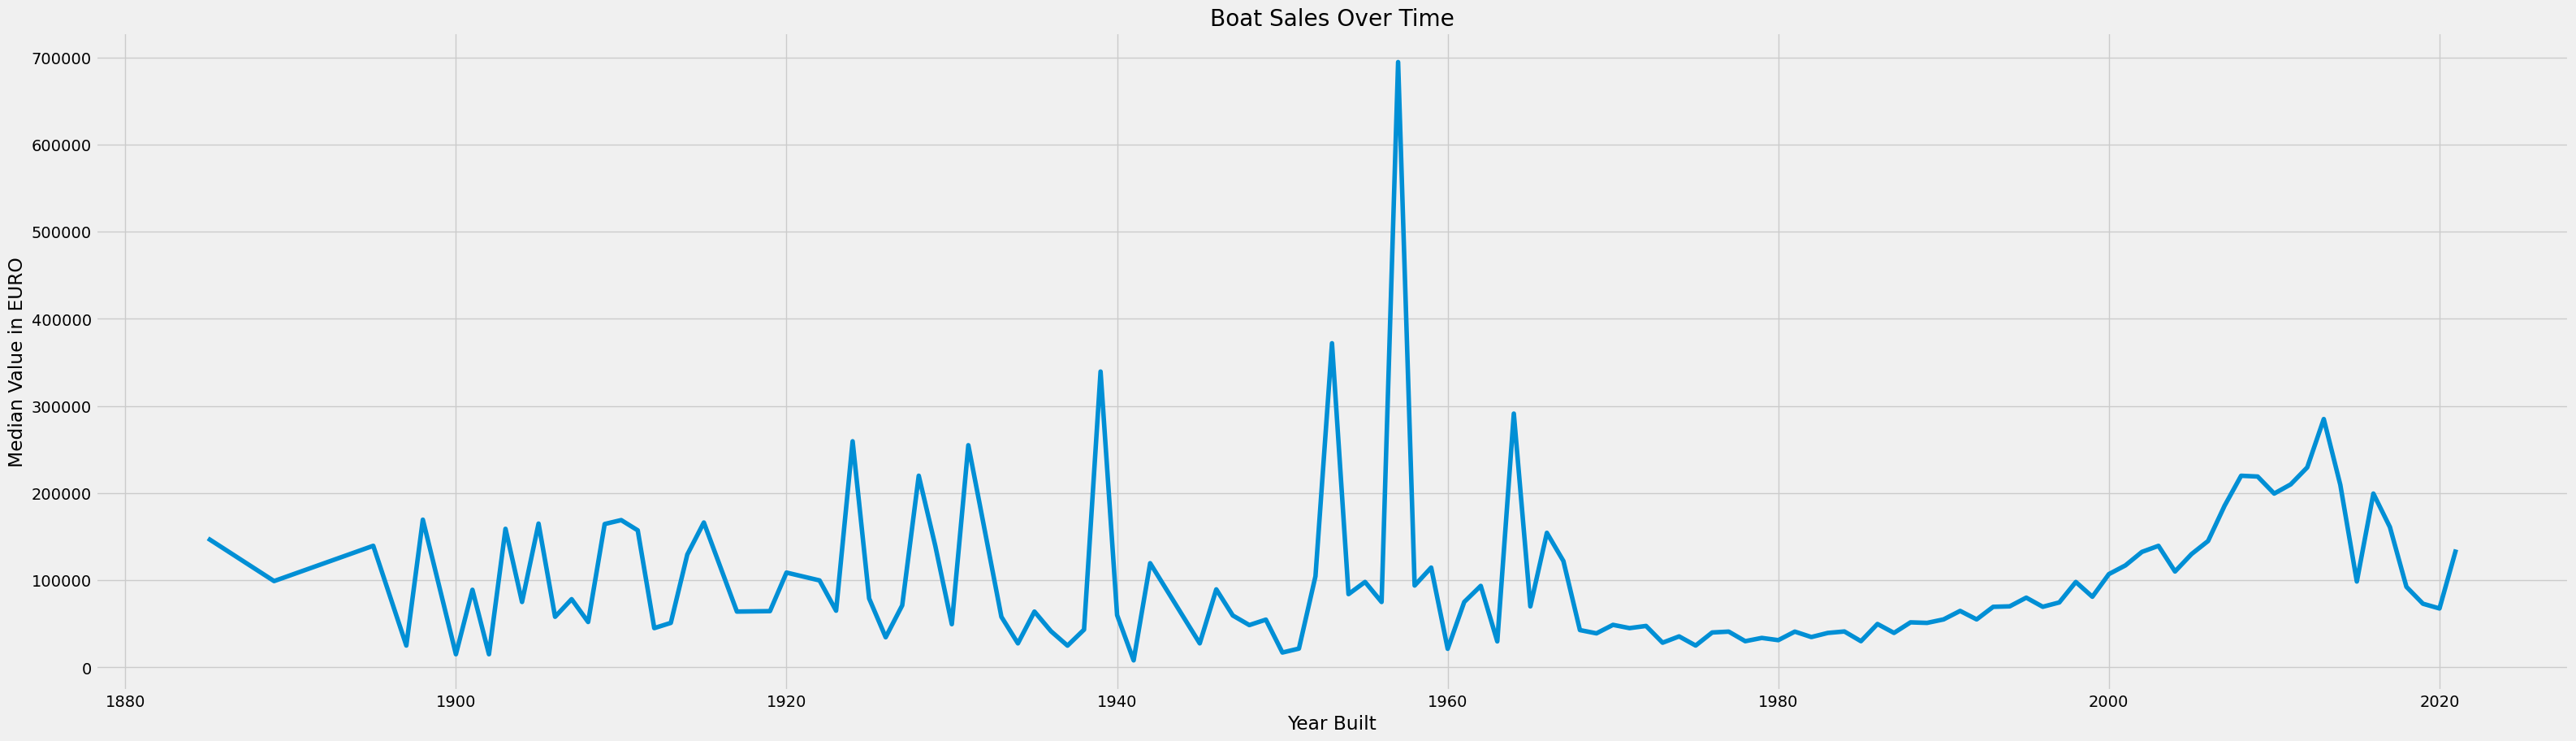

In [8]:
# Group the data by 'year_built' and calculate the median 'value_in_eur' for each year

median_values = df.groupby("year_built").agg({"value_in_eur":["median"]})

figure_1 = plt.figure(figsize = (35,10), dpi = 100)
plt.plot(median_values)
plt.title("Boat Sales Over Time" )
plt.xlabel("Year Built")
plt.ylabel("Median Value in EURO")

In [9]:
figure_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Timeseries.png'))

## 4. Time series analysis: Decomposition

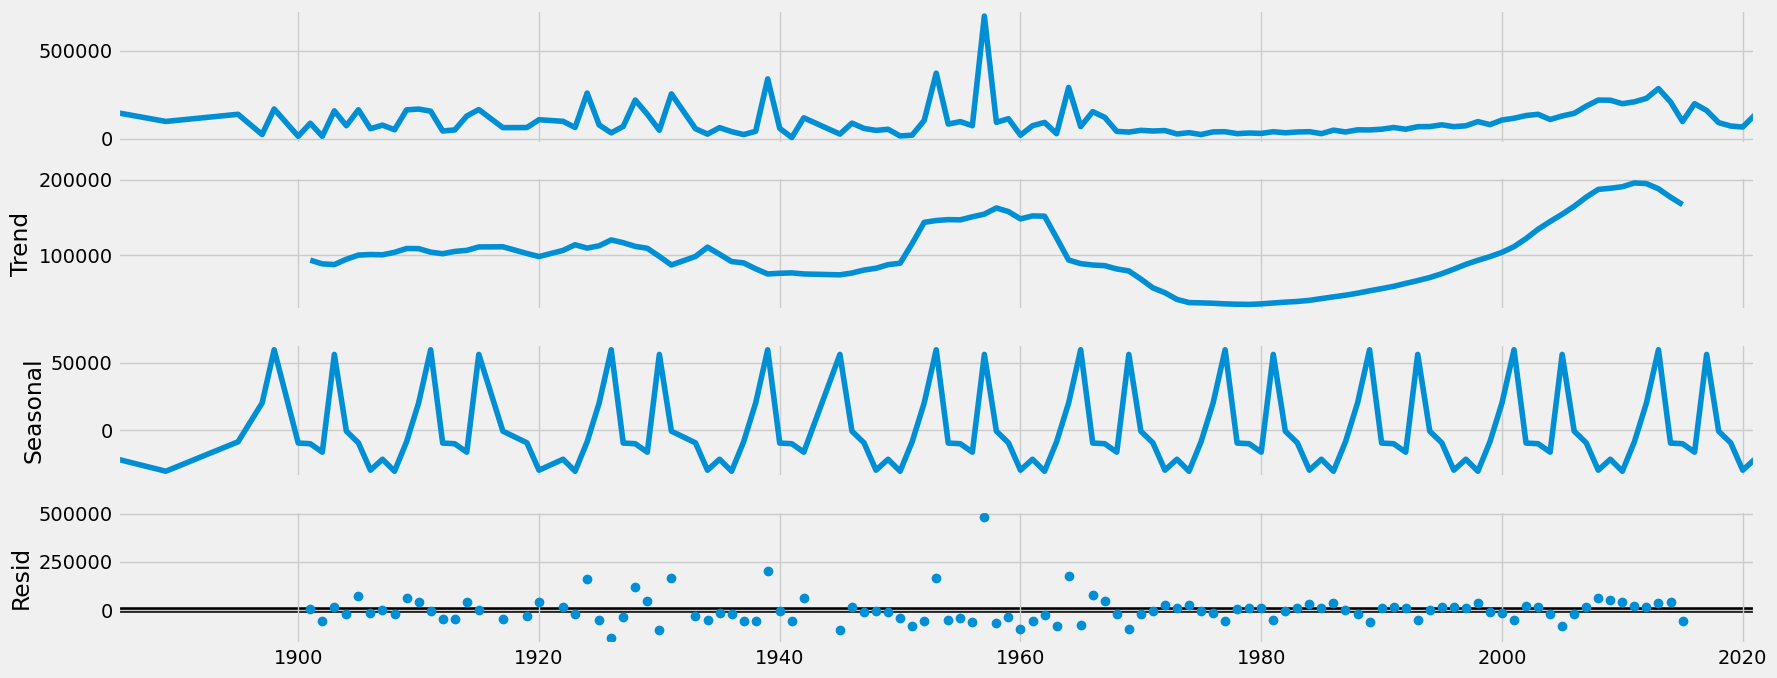

In [13]:
# Decompose the data’s components.

#set the index frequency
median_values.index.freq = 'M'

# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(median_values, model='additive', period = 12)
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7
# Plot the separate components

decomposition.plot()
plt.show()


The trend in the figure above steadily increased about 1952 and then declined from 1962 to 1980. Prices began to rise gradually again in 1981, maybe owing to increased demand for boats. This pattern maintained until 2014.

Seasonality is the third component. Seasonal variations are illustrated by a spikey curve that varies at regular intervals after 1900.

in the Resid plot We can observe that there is inexplicable noise from 1922 to 1970. Aside from the era around 1970, there are a few  big  and small ups and downs.


## 5. Testing for Stationarity
### Conduct a Dickey-Fuller Test to check for stationarity.

In [15]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(median_values['value_in_eur'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.783676
p-value                          0.060644
Number of Lags Used              7.000000
Number of Observations Used    113.000000
Critical Value (1%)             -3.489590
Critical Value (5%)             -2.887477
Critical Value (10%)            -2.580604
dtype: float64


Considering a significance level of 5%, the “Critical Value of 5% has a value of -2.887477. This is smaller than the test statistic, which is -2.783676, The p-value is approximately 0.060644, which is greater than 0.05. Therefore, we cannot reject the null hypothesis. This also suggests that the data is non-stationary.

### Autocorrelation Test

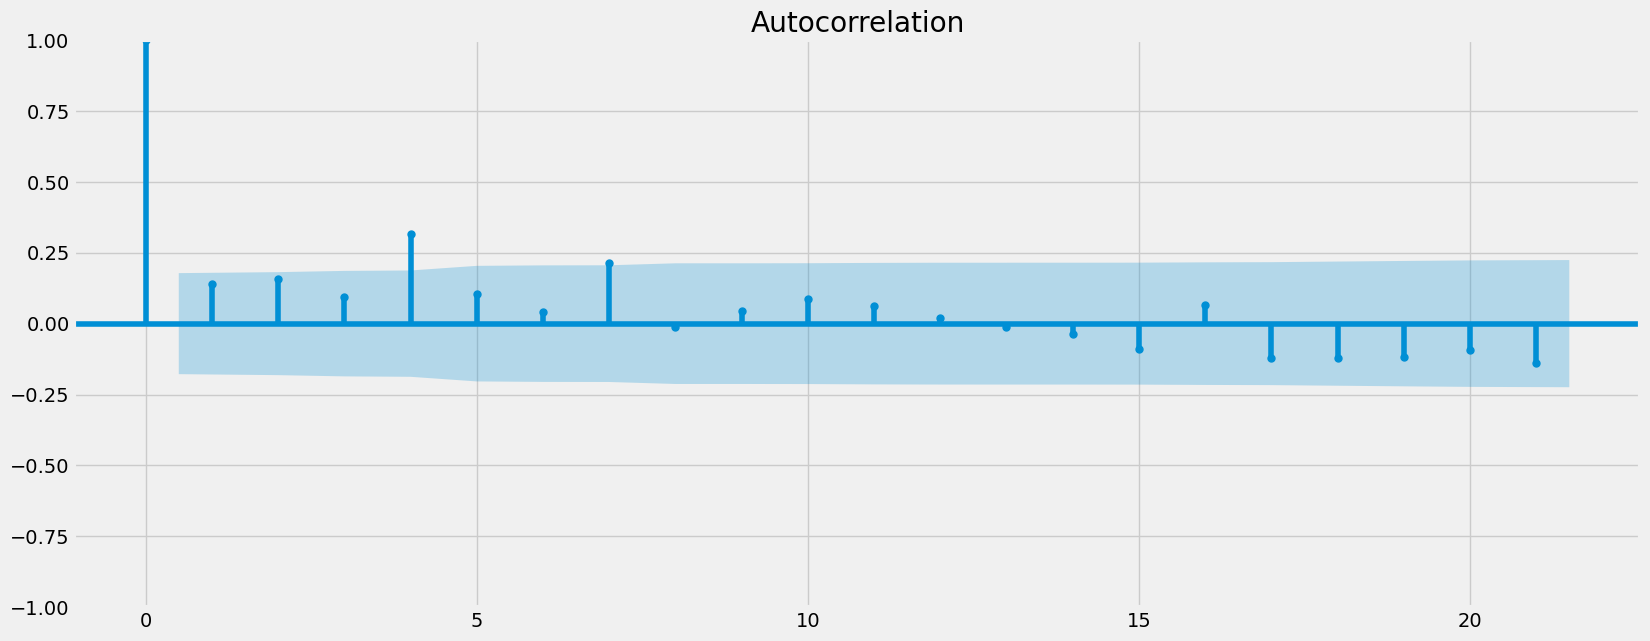

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
# Here, you import the autocorrelation and partial correlation plots

figure_2 = plot_acf(median_values)
plt.show()


In [17]:
figure_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Timeseries.png'))

The vertical lines (lags) that are outside the blue confidence interval bands indicate the presence of strong autocorrelation at those lags. It supports the result of the Dickey-Fuller test, which we conducted early.

## 6. Stationarizing the Data

In [18]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = median_values - median_values.shift(1)

In [19]:
# Here, we remove the missing values that came about as a result of the differencing. 
data_diff.dropna(inplace = True) 

Dickey-Fuller Stationarity test:
Test Statistic                -7.486008e+00
p-value                        4.637235e-11
Number of Lags Used            5.000000e+00
Number of Observations Used    1.140000e+02
Critical Value (1%)           -3.489058e+00
Critical Value (5%)           -2.887246e+00
Critical Value (10%)          -2.580481e+00
dtype: float64


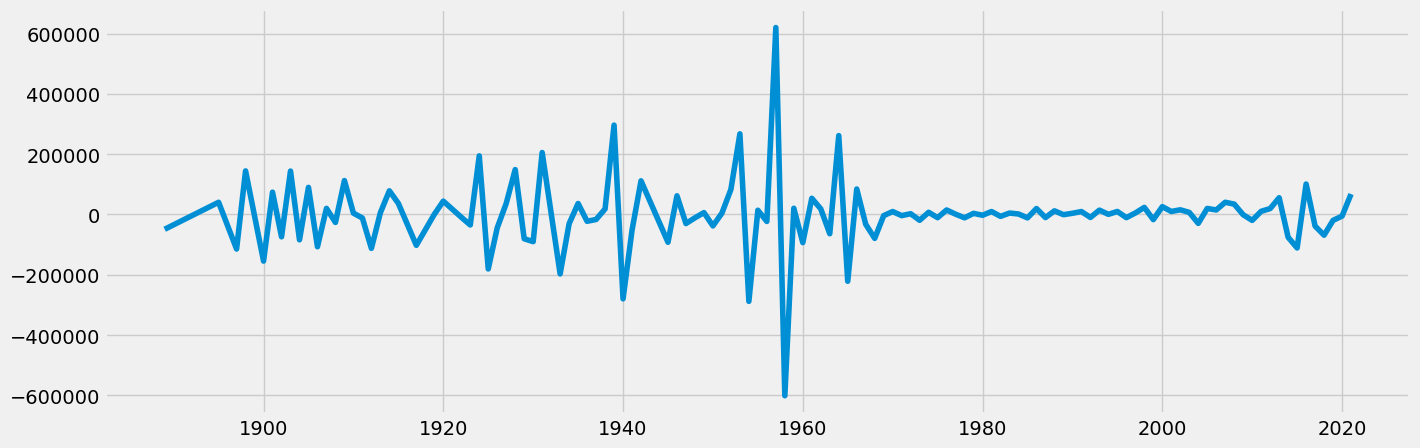

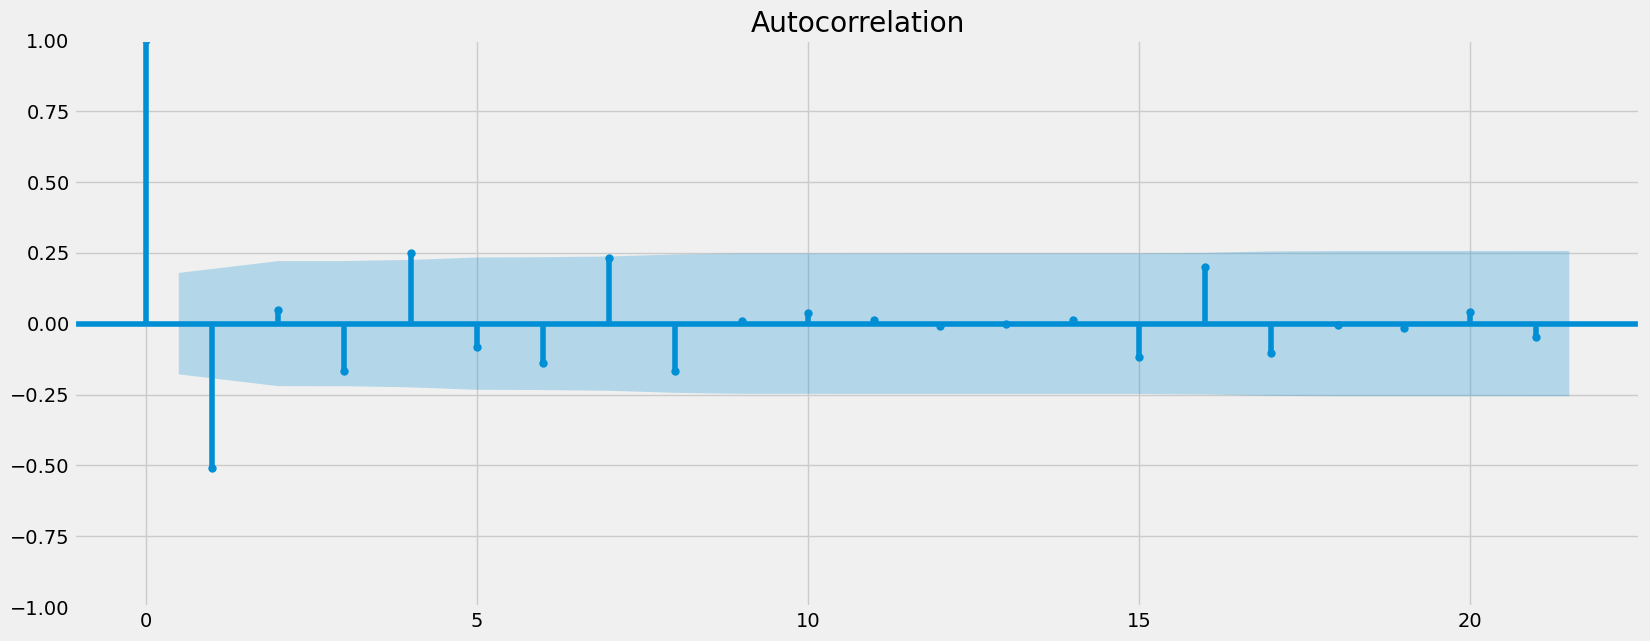

In [20]:
# Checking out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data_diff) 
dickey_fuller(data_diff) 
plot_acf(data_diff) 
plt.show()

If the p-value is less than or equal to a significance level (commonly 0.05), we can reject the null hypothesis. In this case, it suggests that the data is stationary after statinarizing.

In this result, the p-value is approximately 4.637235e-11, which is significantly less than 0.05. Therefore, we can reject the null hypothesis, indicating that the data is stationary.

Based on the result of the Dickey-Fuller test, the data is considered stationary, and we can reject the null hypothesis of non-stationarity. This is a good sign for time series analysis, as many time series techniques assume stationarity for accurate modelling and forecasting.